# Location Location Location? 
### Clustering of Health-Related Sustainable Development Goals

# Analyses
- Cluster countries based on SDG indicators
- Compare countries to their clusters and similar countries 


# Next Steps
- Analyze the forecasted results and/or rates of change

IHME visualization here: https://vizhub.healthdata.org/sdg/

Data Downloaded from 
http://ghdx.healthdata.org/record/global-burden-disease-study-2017-gbd-2017-health-related-sustainable-development-goals-sdg

In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.data.download_DHS import load_SDG_indicators

## Load data

In [8]:
df = load_SDG_indicators()

In [9]:
df.shape

(327795, 14)

In [10]:
df.head()

,location_id,location_name,year_id,estimate_type,indicator_id,indicator_short,ihme_indicator_description,indicator_outline,indicator_unit,target_description,goal_description,scaled_value,scaled_lower,scaled_upper
0,6,China,1990,past,1000,HIV Incid,Indicator 3.3.1: Age-standardised rate of new ...,3.3.1,Scaled/Normalized value ranging from 0-100,"By 2030, end the epidemics of AIDS, tuberculos...",Ensure healthy lives and promote well-being fo...,84.6,77.0,89.2
1,6,China,1991,past,1000,HIV Incid,Indicator 3.3.1: Age-standardised rate of new ...,3.3.1,Scaled/Normalized value ranging from 0-100,"By 2030, end the epidemics of AIDS, tuberculos...",Ensure healthy lives and promote well-being fo...,82.5,76.0,86.5
2,6,China,1992,past,1000,HIV Incid,Indicator 3.3.1: Age-standardised rate of new ...,3.3.1,Scaled/Normalized value ranging from 0-100,"By 2030, end the epidemics of AIDS, tuberculos...",Ensure healthy lives and promote well-being fo...,80.9,75.2,84.6
3,6,China,1993,past,1000,HIV Incid,Indicator 3.3.1: Age-standardised rate of new ...,3.3.1,Scaled/Normalized value ranging from 0-100,"By 2030, end the epidemics of AIDS, tuberculos...",Ensure healthy lives and promote well-being fo...,80.5,75.6,84.2
4,6,China,1994,past,1000,HIV Incid,Indicator 3.3.1: Age-standardised rate of new ...,3.3.1,Scaled/Normalized value ranging from 0-100,"By 2030, end the epidemics of AIDS, tuberculos...",Ensure healthy lives and promote well-being fo...,78.4,73.2,82.4


In [11]:
data = df.query('year_id == 2017')
assert data.duplicated(['location_id', 'indicator_id']).sum() == 0
data = data.pivot(index='location_id', columns='indicator_short', values='scaled_value')
data.head()

indicator_short,Adol Birth Rate,Air Poll Mort,Alcohol Use,Cert Death Reg,Child Overweight,Child Sex Abuse,Child Stunting,Child Wasting,Conflict Mort,Disaster Mort,...,Sexual Violence,Skilled Birth Attend,Smoking Prev,Suicide Mort,TB Incid,UHC Index,Under-5 Mort,Vaccine Cov,WaSH Mort,Water
location_id,,,,,,,,,,,,,,,,,,,,,
6,80.0,38.6,60.5,78.7,65.3,76.2,83.9,93.0,100.0,67.6,...,0.0,98.4,41.3,61.7,53.6,78.7,63.5,88.1,73.8,79.2
7,100.0,18.5,77.9,0.0,92.7,81.8,58.7,73.3,100.0,100.0,...,0.0,87.4,52.5,43.7,32.3,54.8,48.4,70.8,58.8,89.4
8,99.8,62.6,58.9,90.5,22.9,80.7,89.9,94.8,100.0,76.6,...,0.0,99.7,58.0,34.7,60.6,87.9,85.7,85.2,78.8,95.5
10,36.8,21.4,44.9,0.0,98.5,60.5,32.5,53.2,72.5,100.0,...,82.0,92.6,48.9,81.6,23.8,50.6,40.5,78.0,28.6,53.1
11,49.3,39.1,97.5,0.0,71.0,78.5,40.7,30.3,69.0,67.6,...,89.6,85.0,20.6,97.4,27.0,50.4,45.1,43.3,21.1,58.6


## Fit KMeans clustering

In [12]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=7, random_state=0)

Text(0, 0.5, 'inertia')

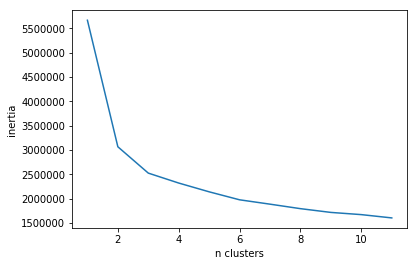

In [13]:
inertias = []
n_clusters = range(1, 12)
for i in n_clusters:
    kmean = KMeans(n_clusters=i, random_state=0)
    kmean.fit(data)
    inertias.append(kmean.inertia_)

plt.plot(n_clusters, inertias)
plt.xlabel('n clusters')
plt.ylabel('inertia')

In [14]:
# We'll arbitrarily use 7 clusters because that's how many GBD super regions there are
kmean = KMeans(n_clusters=7, random_state=0)

In [15]:
kmean.fit(data)
data['cluster'] = kmean.labels_

In [20]:
data.head()

indicator_short,Adol Birth Rate,Air Poll Mort,Alcohol Use,Cert Death Reg,Child Overweight,Child Sex Abuse,Child Stunting,Child Wasting,Conflict Mort,Disaster Mort,...,Skilled Birth Attend,Smoking Prev,Suicide Mort,TB Incid,UHC Index,Under-5 Mort,Vaccine Cov,WaSH Mort,Water,cluster
location_id,,,,,,,,,,,,,,,,,,,,,
6,80.0,38.6,60.5,78.7,65.3,76.2,83.9,93.0,100.0,67.6,...,98.4,41.3,61.7,53.6,78.7,63.5,88.1,73.8,79.2,4
7,100.0,18.5,77.9,0.0,92.7,81.8,58.7,73.3,100.0,100.0,...,87.4,52.5,43.7,32.3,54.8,48.4,70.8,58.8,89.4,1
8,99.8,62.6,58.9,90.5,22.9,80.7,89.9,94.8,100.0,76.6,...,99.7,58.0,34.7,60.6,87.9,85.7,85.2,78.8,95.5,2
10,36.8,21.4,44.9,0.0,98.5,60.5,32.5,53.2,72.5,100.0,...,92.6,48.9,81.6,23.8,50.6,40.5,78.0,28.6,53.1,1
11,49.3,39.1,97.5,0.0,71.0,78.5,40.7,30.3,69.0,67.6,...,85.0,20.6,97.4,27.0,50.4,45.1,43.3,21.1,58.6,1


In [21]:
from src.data.download_DHS import LOCATION_METADATA
data_to_save = pd.merge(LOCATION_METADATA, data.reset_index())
## data_to_save.to_hdf('../models/data_clustered.hdf', key='data')

In [155]:
data_to_save.head()

,location_id,ihme_loc_id,location_name,Adol Birth Rate,Air Poll Mort,Alcohol Use,Cert Death Reg,Child Overweight,Child Sex Abuse,Child Stunting,...,Skilled Birth Attend,Smoking Prev,Suicide Mort,TB Incid,UHC Index,Under-5 Mort,Vaccine Cov,WaSH Mort,Water,cluster
0,33,ARM,Armenia,52.4,41.1,63.0,97.4,20.3,100.0,80.2,...,99.5,38.1,55.8,63.2,71.8,68.9,95.8,76.4,96.6,4
1,34,AZE,Azerbaijan,36.6,34.9,52.6,86.3,18.8,100.0,74.8,...,96.3,42.8,86.3,41.8,60.8,37.9,72.3,58.2,88.3,4
2,35,GEO,Georgia,35.2,37.9,43.9,66.3,18.0,100.0,81.6,...,99.0,35.9,60.0,49.4,64.7,65.4,84.6,75.6,88.9,4
3,36,KAZ,Kazakhstan,47.0,51.3,29.6,88.3,38.6,96.0,84.1,...,99.6,39.6,12.0,48.0,67.6,59.6,66.9,72.8,88.6,4
4,37,KGZ,Kyrgyzstan,40.6,39.7,51.6,97.6,65.9,100.0,73.1,...,99.6,52.1,47.6,40.0,60.7,51.2,72.7,60.5,81.9,4


In [22]:
kmean.cluster_centers_.shape

(7, 41)

In [23]:
data.cluster.value_counts()

4    38
2    37
3    32
5    27
1    24
0    19
6    18
Name: cluster, dtype: int64

In [24]:
df_cluster = data.groupby('cluster').mean() # OR MEDIAN???
df_cluster.head()

indicator_short,Adol Birth Rate,Air Poll Mort,Alcohol Use,Cert Death Reg,Child Overweight,Child Sex Abuse,Child Stunting,Child Wasting,Conflict Mort,Disaster Mort,...,Sexual Violence,Skilled Birth Attend,Smoking Prev,Suicide Mort,TB Incid,UHC Index,Under-5 Mort,Vaccine Cov,WaSH Mort,Water
cluster,,,,,,,,,,,,,,,,,,,,,
0,57.863158,46.584211,91.973684,59.836842,36.589474,68.600000,78.900000,77.926316,44.747368,93.336842,...,87.642105,95.947368,61.610526,85.784211,67.889474,70.757895,63.210526,81.436842,64.484211,78.278947
1,36.766667,22.795833,83.516667,9.445833,83.754167,44.670833,43.962500,50.420833,78.287500,78.570833,...,63.762500,71.983333,51.054167,52.737500,33.308333,41.683333,38.604167,60.929167,27.016667,44.341667
2,82.572973,84.072973,29.183784,89.337838,38.197297,58.040541,96.437838,96.532432,97.243243,91.783784,...,86.337838,99.602703,44.370270,51.478378,88.862162,95.270270,92.056757,81.372973,90.881081,97.927027
3,29.175000,56.740625,54.625000,84.178125,55.662500,60.303125,80.428125,90.853125,96.921875,72.309375,...,76.228125,96.850000,74.887500,64.509375,67.393750,61.915625,57.318750,73.893750,50.503125,62.815625
4,51.194737,49.410526,47.931579,81.373684,44.713158,57.807895,83.426316,82.926316,96.073684,89.563158,...,81.473684,98.357895,33.181579,43.292105,60.328947,69.200000,66.294737,70.384211,71.702632,85.850000


In [25]:
from src.data.download_DHS import load_gbd_location_metadata
location_metadata = load_gbd_location_metadata()

In [26]:
df_final = pd.merge(location_metadata, data.reset_index())
df_final.head()

,location_id,ihme_loc_id,location_name,Adol Birth Rate,Air Poll Mort,Alcohol Use,Cert Death Reg,Child Overweight,Child Sex Abuse,Child Stunting,...,Skilled Birth Attend,Smoking Prev,Suicide Mort,TB Incid,UHC Index,Under-5 Mort,Vaccine Cov,WaSH Mort,Water,cluster
0,33,ARM,Armenia,52.4,41.1,63.0,97.4,20.3,100.0,80.2,...,99.5,38.1,55.8,63.2,71.8,68.9,95.8,76.4,96.6,4
1,34,AZE,Azerbaijan,36.6,34.9,52.6,86.3,18.8,100.0,74.8,...,96.3,42.8,86.3,41.8,60.8,37.9,72.3,58.2,88.3,4
2,35,GEO,Georgia,35.2,37.9,43.9,66.3,18.0,100.0,81.6,...,99.0,35.9,60.0,49.4,64.7,65.4,84.6,75.6,88.9,4
3,36,KAZ,Kazakhstan,47.0,51.3,29.6,88.3,38.6,96.0,84.1,...,99.6,39.6,12.0,48.0,67.6,59.6,66.9,72.8,88.6,4
4,37,KGZ,Kyrgyzstan,40.6,39.7,51.6,97.6,65.9,100.0,73.1,...,99.6,52.1,47.6,40.0,60.7,51.2,72.7,60.5,81.9,4


## Map clusters

In [27]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [28]:
# Connect Javascript to display the plots in the notebook
init_notebook_mode(connected=True)

In [98]:
# https://www.w3schools.com/colors/colors_picker.asp
palette = {
    0: '#ff0000',
    1: '#ff8000',
    2: '#ffff00',
    3: '#40ff00',
    4: '#00ffff',
    5: '#0000ff',
    6: '#ff00ff',
}
scl = [[k/(len(palette)-1), palette[k]] for k in palette.keys()] 
scl

[[0.0, '#ff0000'],
 [0.16666666666666666, '#ff8000'],
 [0.3333333333333333, '#ffff00'],
 [0.5, '#40ff00'],
 [0.6666666666666666, '#00ffff'],
 [0.8333333333333334, '#0000ff'],
 [1.0, '#ff00ff']]

In [182]:
map_data = [dict(type='choropleth',
           locations=df_final['ihme_loc_id'], 
           z = df_final['cluster'],
            text=df_final['location_name'],
             colorscale= scl, # [[0,"rgb(5, 10, 172)"], [1, '#ff0000'], [6,"#ff00ff"]], #colorscale, #'Blackbody', #scale, Rainbow
             autocolorscale = False,
            # colorbar = {'title': 'Cluster'}
                 showscale=False,
            )]

In [183]:
layout = dict(title='Clustering countries based on SDG Indicators',
              height=1000, width=1200,
             geo=dict(showframe=False,
                     projection={'type':'natural earth'}))

In [184]:
iplot(map_data)

In [168]:
fig = dict(data=map_data, layout=layout)
iplot(fig)

# Analysis 1
Plot clusters against each other

In [21]:
from src.visualization.clustering import plot_cluster_heatmap, plot_cluster_indicators

In [23]:
df_cluster.head()

indicator_short,Adol Birth Rate,Air Poll Mort,Alcohol Use,Cert Death Reg,Child Overweight,Child Sex Abuse,Child Stunting,Child Wasting,Conflict Mort,Disaster Mort,...,Sexual Violence,Skilled Birth Attend,Smoking Prev,Suicide Mort,TB Incid,UHC Index,Under-5 Mort,Vaccine Cov,WaSH Mort,Water
cluster,,,,,,,,,,,,,,,,,,,,,
0,57.863158,46.584211,91.973684,59.836842,36.589474,68.600000,78.900000,77.926316,44.747368,93.336842,...,87.642105,95.947368,61.610526,85.784211,67.889474,70.757895,63.210526,81.436842,64.484211,78.278947
1,36.766667,22.795833,83.516667,9.445833,83.754167,44.670833,43.962500,50.420833,78.287500,78.570833,...,63.762500,71.983333,51.054167,52.737500,33.308333,41.683333,38.604167,60.929167,27.016667,44.341667
2,82.572973,84.072973,29.183784,89.337838,38.197297,58.040541,96.437838,96.532432,97.243243,91.783784,...,86.337838,99.602703,44.370270,51.478378,88.862162,95.270270,92.056757,81.372973,90.881081,97.927027
3,29.175000,56.740625,54.625000,84.178125,55.662500,60.303125,80.428125,90.853125,96.921875,72.309375,...,76.228125,96.850000,74.887500,64.509375,67.393750,61.915625,57.318750,73.893750,50.503125,62.815625
4,51.194737,49.410526,47.931579,81.373684,44.713158,57.807895,83.426316,82.926316,96.073684,89.563158,...,81.473684,98.357895,33.181579,43.292105,60.328947,69.200000,66.294737,70.384211,71.702632,85.850000


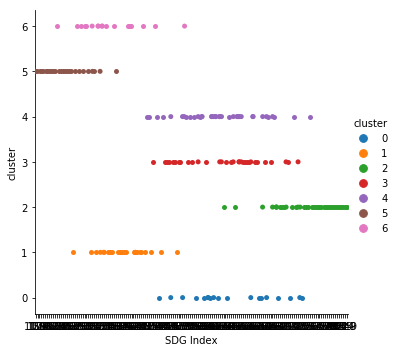

In [24]:
sns.catplot(x='SDG Index', y='cluster', hue='cluster', data=data)

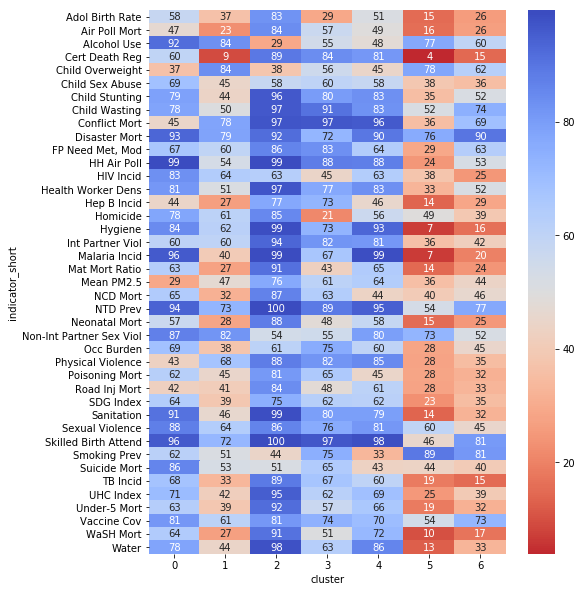

In [25]:
plot_cluster_heatmap(df_cluster)

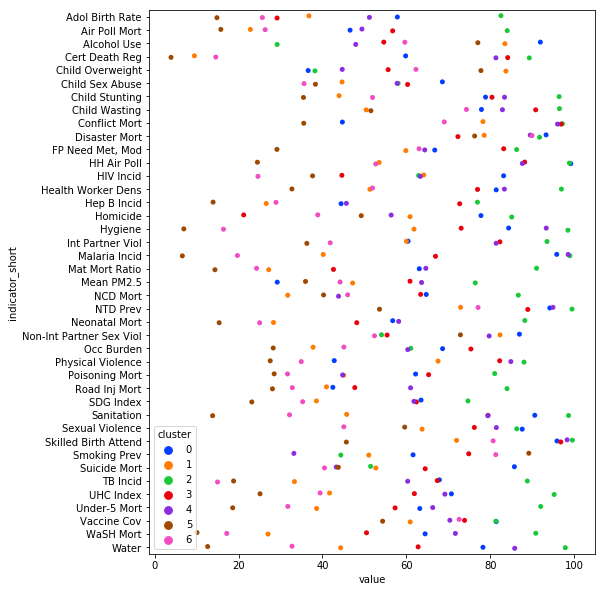

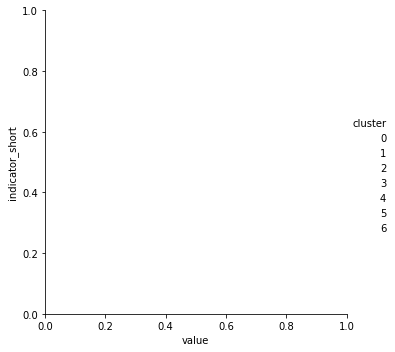

In [26]:
plot_cluster_indicators(df_cluster, reference_cluster=None)

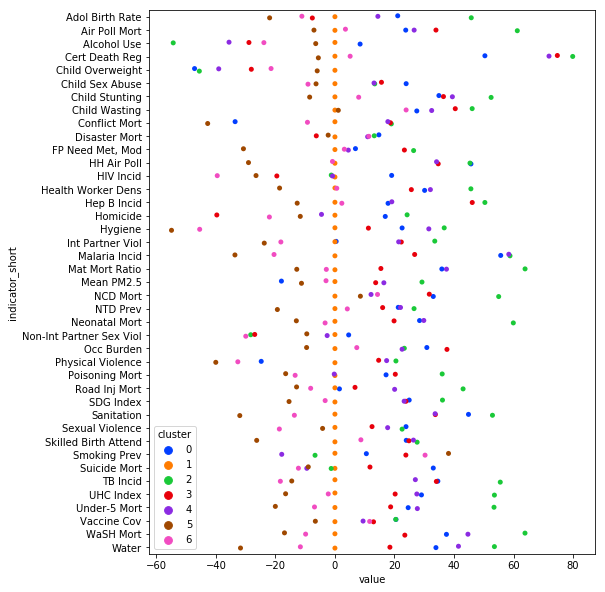

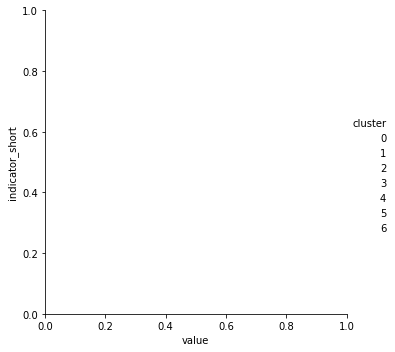

In [28]:
plot_cluster_indicators(df_cluster, reference_cluster=1)

### Look at how the three clusters that are similar in SDG index compare

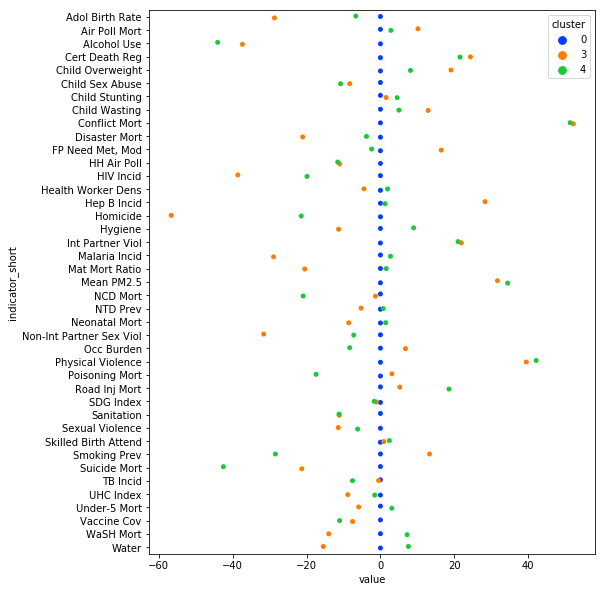

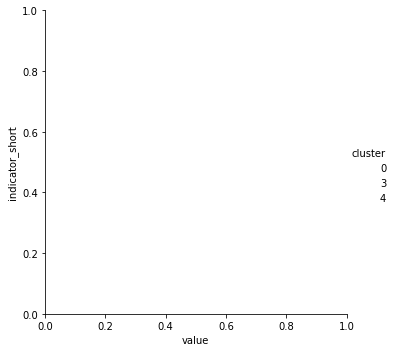

In [29]:
plot_cluster_indicators(df_cluster, reference_cluster=0, clusters=[0,3,4])

In [103]:
df_cluster.head()

indicator_short,Adol Birth Rate,Air Poll Mort,Alcohol Use,Cert Death Reg,Child Overweight,Child Sex Abuse,Child Stunting,Child Wasting,Conflict Mort,Disaster Mort,...,Sexual Violence,Skilled Birth Attend,Smoking Prev,Suicide Mort,TB Incid,UHC Index,Under-5 Mort,Vaccine Cov,WaSH Mort,Water
cluster,,,,,,,,,,,,,,,,,,,,,
0,57.863158,46.584211,91.973684,59.836842,36.589474,68.600000,78.900000,77.926316,44.747368,93.336842,...,87.642105,95.947368,61.610526,85.784211,67.889474,70.757895,63.210526,81.436842,64.484211,78.278947
1,36.766667,22.795833,83.516667,9.445833,83.754167,44.670833,43.962500,50.420833,78.287500,78.570833,...,63.762500,71.983333,51.054167,52.737500,33.308333,41.683333,38.604167,60.929167,27.016667,44.341667
2,82.572973,84.072973,29.183784,89.337838,38.197297,58.040541,96.437838,96.532432,97.243243,91.783784,...,86.337838,99.602703,44.370270,51.478378,88.862162,95.270270,92.056757,81.372973,90.881081,97.927027
3,29.175000,56.740625,54.625000,84.178125,55.662500,60.303125,80.428125,90.853125,96.921875,72.309375,...,76.228125,96.850000,74.887500,64.509375,67.393750,61.915625,57.318750,73.893750,50.503125,62.815625
4,51.194737,49.410526,47.931579,81.373684,44.713158,57.807895,83.426316,82.926316,96.073684,89.563158,...,81.473684,98.357895,33.181579,43.292105,60.328947,69.200000,66.294737,70.384211,71.702632,85.850000


In [121]:
df_long = df_cluster.reset_index().melt(id_vars='cluster')
df_long['color'] = df_long.cluster.map(palette)
df_long.head()

,cluster,indicator_short,value,color
0,0,Adol Birth Rate,57.863158,#ff0000
1,1,Adol Birth Rate,36.766667,#ff8000
2,2,Adol Birth Rate,82.572973,#ffff00
3,3,Adol Birth Rate,29.175000,#40ff00
4,4,Adol Birth Rate,51.194737,#00ffff


In [118]:
go.Scatter?

In [123]:
data = [
    go.Scatter(
        y=df_long['indicator_short'], # assign x as the dataframe column 'x'
        x=df_long['value'],
        mode='markers',
        fillcolor=df_long['color'],
    )
]
iplot(data)

In [126]:
df = df_long.copy()

In [129]:
df_cluster.head()

indicator_short,Adol Birth Rate,Air Poll Mort,Alcohol Use,Cert Death Reg,Child Overweight,Child Sex Abuse,Child Stunting,Child Wasting,Conflict Mort,Disaster Mort,...,Sexual Violence,Skilled Birth Attend,Smoking Prev,Suicide Mort,TB Incid,UHC Index,Under-5 Mort,Vaccine Cov,WaSH Mort,Water
cluster,,,,,,,,,,,,,,,,,,,,,
0,57.863158,46.584211,91.973684,59.836842,36.589474,68.600000,78.900000,77.926316,44.747368,93.336842,...,87.642105,95.947368,61.610526,85.784211,67.889474,70.757895,63.210526,81.436842,64.484211,78.278947
1,36.766667,22.795833,83.516667,9.445833,83.754167,44.670833,43.962500,50.420833,78.287500,78.570833,...,63.762500,71.983333,51.054167,52.737500,33.308333,41.683333,38.604167,60.929167,27.016667,44.341667
2,82.572973,84.072973,29.183784,89.337838,38.197297,58.040541,96.437838,96.532432,97.243243,91.783784,...,86.337838,99.602703,44.370270,51.478378,88.862162,95.270270,92.056757,81.372973,90.881081,97.927027
3,29.175000,56.740625,54.625000,84.178125,55.662500,60.303125,80.428125,90.853125,96.921875,72.309375,...,76.228125,96.850000,74.887500,64.509375,67.393750,61.915625,57.318750,73.893750,50.503125,62.815625
4,51.194737,49.410526,47.931579,81.373684,44.713158,57.807895,83.426316,82.926316,96.073684,89.563158,...,81.473684,98.357895,33.181579,43.292105,60.328947,69.200000,66.294737,70.384211,71.702632,85.850000


In [154]:
data = [
            go.Scatter(
                x=df[df['cluster'] == i]['value'],
                y=df[df['cluster'] == i]['indicator_short'],
                text= str(i), #df[df['cluster'] == i]['location_name'],
                mode='markers',
                opacity=0.7,
                marker={
                    'size': 10,
                    'color': df[df['cluster'] == i]['color'], # palette[i],
                    'line': {'width': 0.5, 'color': 'white'}
                },
                name=f'Cluster {i}'
            ) for i in df.cluster.unique()
        ]
layout = go.Layout(
            title='SDG Indicator Index by Cluster',
            xaxis={'title': 'Index Value'},
#             yaxis={'title': 'test'},
            margin={'l': 120, 'b': 40, 't': 40, 'r': 0},
            # legend={'x': 0, 'y': 1},
            hovermode='closest')
fig = dict(data=data, layout=layout)

# iplot(data)
iplot(fig)

In [108]:
# Try to do this with Plotly

fig = {
    'data': [
        {
            'x': df_long['value'], 
            'y': df_long['value'],
            # text': df_cluster.reset_index()['cluster'],
            'mode': 'markers',
        },
#         {
#             'x': df1952.gdpPercap, 
#         	'y': df1952.lifeExp, 
#         	'text': df1952.country, 
#         	'mode': 'markers', 
#         	'name': '1952'}
    ],
    'layout': {
        'xaxis': {'title': 'GDP per Capita', 'type': 'log'},
        'yaxis': {'title': "Life Expectancy"}
    }
}

# fig = dict(data=map_data, layout=layout)
iplot(fig)

# Analysis 2: 
At country level, which indicators is it much better/worse than its cluster and similar countries? 

In [30]:
from src.visualization.clustering import plot_country_vs_cluster

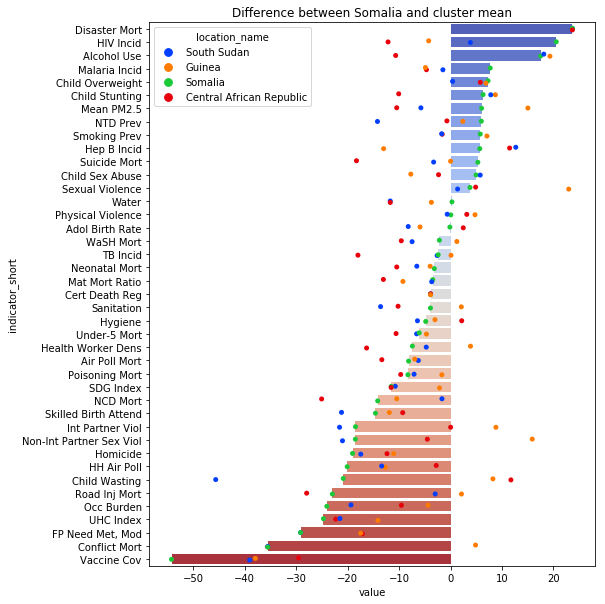

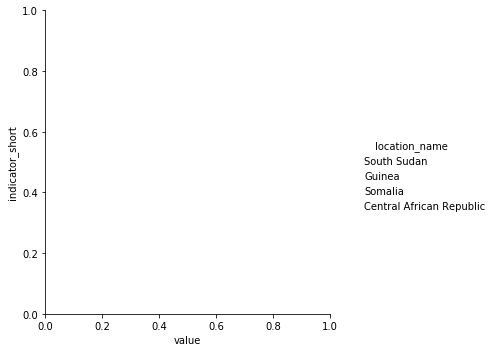

In [31]:
plot_country_vs_cluster(data, df_cluster, 'Somalia', plot_neighbors=True, n_neighbors=3)

# SCRATCH

In [32]:
loc_name = 'Somalia'
loc_id = int(location_metadata.loc[location_metadata.location_name == loc_name].location_id)

# Compare country indicators to cluster mean
l_data = data.loc[loc_id].drop('cluster')
l_cluster = int(data.loc[loc_id].cluster)
c_data = df_cluster.loc[l_cluster]
# If you wanted cluster centroid
# centroid_data = kmean.cluster_centers_[int(l_cluster)]

dif = l_data - c_data
dif = dif.sort_values(ascending=False)

similarity = np.abs(data**2 - l_data**2).sum(axis=1).sort_values()
idx_similar = similarity[:4].index
data.loc[idx_similar]

indicator_short,Adol Birth Rate,Air Poll Mort,Alcohol Use,Cert Death Reg,Child Overweight,Child Sex Abuse,Child Stunting,Child Wasting,Conflict Mort,Disaster Mort,...,Skilled Birth Attend,Smoking Prev,Suicide Mort,TB Incid,UHC Index,Under-5 Mort,Vaccine Cov,WaSH Mort,Water,cluster
location_id,,,,,,,,,,,,,,,,,,,,,
187,14.7,7.6,94.6,0.0,85.1,43.3,41.8,30.7,0.0,100.0,...,31.1,95.0,49.1,16.4,0.4,12.5,0.1,7.9,12.9,5
435,6.6,9.5,95.2,0.0,78.2,44.1,43.3,5.9,0.0,100.0,...,24.5,87.5,40.5,16.2,3.6,12.0,15.3,2.6,0.9,5
169,17.3,2.4,66.4,0.0,83.6,36.0,25.4,63.3,0.0,100.0,...,36.4,87.6,25.5,0.8,2.8,8.0,24.8,0.5,0.9,5
208,8.9,8.8,96.4,0.0,84.7,30.6,44.2,59.8,40.4,100.0,...,33.8,96.3,43.8,18.9,11.0,13.9,16.4,11.3,8.9,5


In [33]:
idx_similar = similarity[:4].index
df_similar = data.loc[idx_similar] #.drop('cluster', axis=1).reset_index().melt(id_vars='location_id')
df_similar.head()

indicator_short,Adol Birth Rate,Air Poll Mort,Alcohol Use,Cert Death Reg,Child Overweight,Child Sex Abuse,Child Stunting,Child Wasting,Conflict Mort,Disaster Mort,...,Skilled Birth Attend,Smoking Prev,Suicide Mort,TB Incid,UHC Index,Under-5 Mort,Vaccine Cov,WaSH Mort,Water,cluster
location_id,,,,,,,,,,,,,,,,,,,,,
187,14.7,7.6,94.6,0.0,85.1,43.3,41.8,30.7,0.0,100.0,...,31.1,95.0,49.1,16.4,0.4,12.5,0.1,7.9,12.9,5
435,6.6,9.5,95.2,0.0,78.2,44.1,43.3,5.9,0.0,100.0,...,24.5,87.5,40.5,16.2,3.6,12.0,15.3,2.6,0.9,5
169,17.3,2.4,66.4,0.0,83.6,36.0,25.4,63.3,0.0,100.0,...,36.4,87.6,25.5,0.8,2.8,8.0,24.8,0.5,0.9,5
208,8.9,8.8,96.4,0.0,84.7,30.6,44.2,59.8,40.4,100.0,...,33.8,96.3,43.8,18.9,11.0,13.9,16.4,11.3,8.9,5


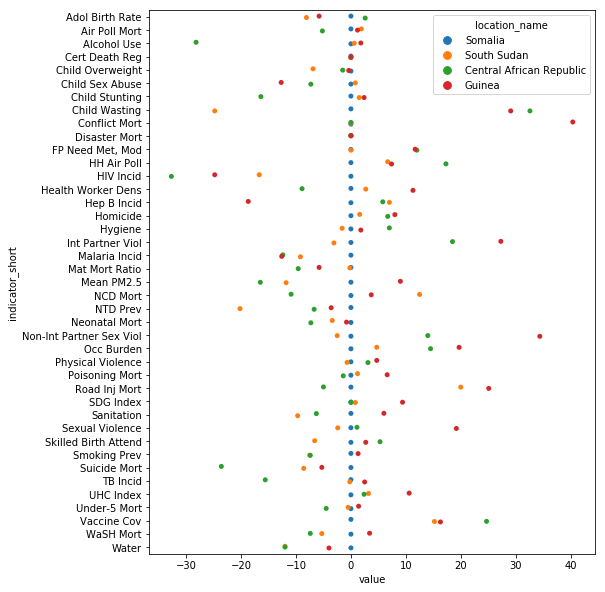

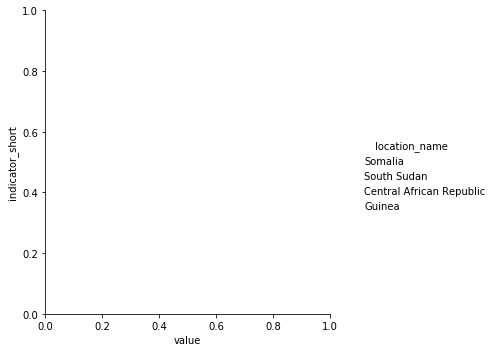

In [34]:
dif_similar = (df_similar - data.loc[loc_id]).drop('cluster', axis=1).reset_index().melt(id_vars='location_id')
dif_similar = pd.merge(dif_similar, location_metadata)
fig, ax = plt.subplots(figsize=(8, 10))
sns.catplot(x='value', y='indicator_short', hue='location_name', data=dif_similar, ax=ax)

# Analysis 3: 
Which countries are similar to a given country, and what are the key differences? 

In [35]:
loc_name = 'India'
loc_id = int(location_metadata.loc[location_metadata.location_name == loc_name].location_id.values)

# Compare country indicators to centroid data 
l_data = data.loc[loc_id].drop('cluster')
l_cluster = int(df_final.loc[df_final.location_id == loc_id].cluster)

In [36]:
dat = data.loc[data.cluster == l_cluster].drop('cluster', axis=1)
similarity = np.abs(dat**2 - l_data**2).sum(axis=1).sort_values()
similarity.head()

location_id
163        0.00
165    47549.65
157    57572.73
164    61645.75
212    62915.34
dtype: float64

In [37]:
similar_locs = similarity[0:4].index.tolist()
similar_locs

[163, 165, 157, 164]

In [38]:
similar_dat = pd.concat([data.reset_index().query(f'location_id == {l}') for l in similar_locs])
similar_dat = similar_dat.melt(id_vars='location_id')
similar_dat = pd.merge(similar_dat, location_metadata)
similar_dat.head()

,location_id,indicator_short,value,ihme_loc_id,location_name
0,163,Adol Birth Rate,51.5,IND,India
1,163,Air Poll Mort,18.4,IND,India
2,163,Alcohol Use,73.4,IND,India
3,163,Cert Death Reg,1.5,IND,India
4,163,Child Overweight,82.0,IND,India


# TODO - Make selected country the focus
Since this is all on an arbitrary scale, could I do absolute difference to each neighbor, then plot those? Would I order based on which things they score lowest on, or which they're doing worst compared to cluster? 

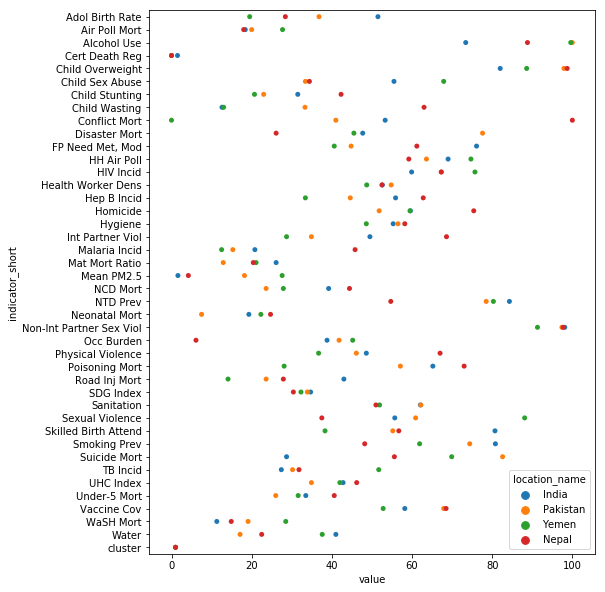

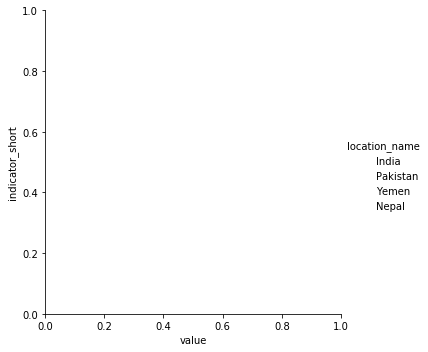

In [39]:
fig, ax = plt.subplots(figsize=(8, 10))
sns.catplot(x='value', y='indicator_short', hue='location_name', jitter=False, data=similar_dat, ax=ax)
# plt.title(loc_name)
# plt.xlabel("Difference between country and cluster centroid")